In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('engagement_dataset.csv')

In [4]:
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18332 non-null  object 
 1   Available Globally?  18332 non-null  object 
 2   Release Date         4879 non-null   object 
 3   Hours Viewed         18332 non-null  int64  
 4   Number of Ratings    14222 non-null  float64
 5   Rating               14222 non-null  float64
 6   Genre                15761 non-null  object 
 7   Key Words            12801 non-null  object 
 8   Description          10619 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Number of Ratings', 'Rating', 'Genre', 'Key Words', 'Description'],
      dtype='object')

In [5]:
df.isnull().sum()

Title                      0
Available Globally?        0
Release Date           13453
Hours Viewed               0
Number of Ratings       4110
Rating                  4110
Genre                   2571
Key Words               5531
Description             7713
dtype: int64

In [6]:
print(df['Title'].duplicated().sum())

118


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Viewed,18332.0,5.120205e+06,1.867122e+07,100000.0,200000.00,700000.0,3400000.0,812100000.0
Number of Ratings,14222.0,4.613511e+04,1.486087e+05,5.0,343.25,2594.0,19355.0,2829797.0
Rating,14222.0,6.509056e+00,1.227839e+00,1.2,5.80,6.6,7.3,10.0


In [8]:
df['Available Globally?'].value_counts()

Available Globally?
No     13798
Yes     4534
Name: count, dtype: int64

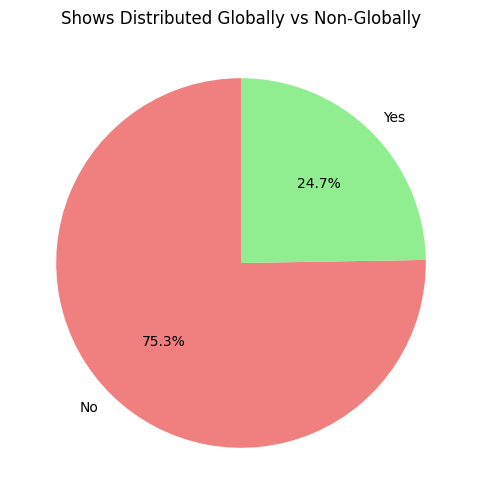

In [9]:
value_count = df['Available Globally?'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(value_count,labels=value_count.index,autopct='%1.1f%%',startangle=90, colors=['lightcoral','lightgreen'])
plt.title('Shows Distributed Globally vs Non-Globally')
plt.show()

In [10]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Number of Ratings'] = np.int64(df['Number of Ratings'])
df['Release Year'] = df['Release Date'].dt.year.fillna(0).astype('int64')
df['Release Month'] = df['Release Date'].dt.month.fillna(0).astype('int64')
df['Release Day'] = df['Release Date'].dt.day_name()

/home/malhar/User_Drive/TY_Study/DSci_Lab/venv/lib/python3.13/site-packages/pandas/core/series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [11]:
df['Release Day'].fillna('Unknown', inplace = True)

/tmp/ipykernel_11779/2657341095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Release Day'].fillna('Unknown', inplace = True)


In [25]:
df['Number of Ratings'].max()


np.int64(2829797)

In [26]:
df['Number of Ratings'].min()

np.int64(-9223372036854775808)

In [13]:
df[df['Number of Ratings'] <= 0]['Number of Ratings'].count()

np.int64(4110)

In [14]:
df[df['Number of Ratings'] <= 0]['Number of Ratings'].nunique()

1

In [15]:
df_with_ratings = df.loc[df['Number of Ratings'] > 0]
df_with_ratings.sample(3)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,Release Year,Release Month,Release Day
10464,The Governor (2016): Season 1,No,NaT,500000,11,7.0,"['Documentary', 'Short']",NaN,NaN,0,0,Unknown
8525,Wild Kratts: Season 1,No,NaT,900000,70,5.9,"['Documentary', 'Short', 'Sport']","voice over narration,log raft,wild river,white...",This Sportscope short features the sport of ka...,0,0,Unknown
18327,راس السنة,No,NaT,100000,383,4.8,['Drama'],live,A tale of different people whose lives intertw...,0,0,Unknown


In [16]:
df["Available Globally"] = df["Available Globally?"]
df.drop(columns=("Available Globally?"), axis = 1, inplace = True)

In [18]:
df.to_csv("cleaned.csv")

In [19]:
df_with_ratings = df.loc[df['Number of Ratings'] > 0]
df_with_ratings.sample(3)
df_with_ratings.shape
df_with_ratings.Rating.isnull().sum()
df_with_ratings.Rating.isnull().sum()
df_with_ratings.Genre.unique()

array(["['Biography', 'Drama', 'History']",
       "['Comedy', 'Drama', 'Romance']", "['Short']",
       "['Drama', 'History', 'Romance']", "['Comedy', 'Romance']",
       "['Action', 'Crime', 'Drama']", "['Short', 'Comedy']",
       "['Action', 'Thriller']", "['Drama', 'Family']",
       "['Crime', 'Drama', 'Mystery']", "['Sport']",
       "['Action', 'Adventure', 'Drama']",
       "['Horror', 'Mystery', 'Sci-Fi']",
       "['Family', 'History', 'Sport']", "['Romance']",
       "['Drama', 'Horror', 'Thriller']", "['Action', 'Comedy', 'Crime']",
       "['Comedy']", "['Drama', 'Family', 'Musical']",
       "['Adventure', 'Family', 'Fantasy']",
       "['Animation', 'Action', 'Adventure']",
       "['Adventure', 'Comedy', 'Family']",
       "['Short', 'Drama', 'Western']", "['Comedy', 'Crime', 'Drama']",
       "['Horror']", "['Animation', 'Short']",
       "['Drama', 'Fantasy', 'Horror']", "['Crime', 'Drama']",
       "['Animation', 'Short', 'Adventure']",
       "['Adventure', 'Comedy

In [ ]:
df_with_ratings.Genre.isnull().sum()
df_with_ratings.dropna(subset=['Genre'], inplace = True)
df_with_ratings.isnull().sum()
df_with_ratings['Release Date'].fillna(0, inplace = True)
df_with_ratings.shape

/tmp/ipykernel_11779/103863943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_ratings.dropna(subset=['Genre'], inplace = True)
/tmp/ipykernel_11779/103863943.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_ratings['Release Date'].fillna(0, inplace = True)
/tmp/ipykernel_11779/103863943.py:4: FutureWarning: Setting an i

(14189, 12)

In [21]:
df_with_ratings['Key Words'].fillna('unknown', inplace = True)
df_with_ratings['Description'].fillna('unknown', inplace = True)
df_with_ratings.isnull().sum()

/tmp/ipykernel_11779/1913763075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_ratings['Key Words'].fillna('unknown', inplace = True)
/tmp/ipykernel_11779/1913763075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_ratings['Key Words'].fillna('unknown', inplace = True)
/tmp/ipykernel_11779/1913763075.py:2: FutureWarning

Title                 0
Release Date          0
Hours Viewed          0
Number of Ratings     0
Rating                0
Genre                 0
Key Words             0
Description           0
Release Year          0
Release Month         0
Release Day           0
Available Globally    0
dtype: int64

In [22]:
all_genres = set(genre.strip("[]").replace("'", "") for genres in df_with_ratings['Genre'].str.split(", ") for genre in genres)
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [23]:
len(all_genres)
for genre in all_genres:
    print(genre,'--->')
    print(df_with_ratings[df_with_ratings['Genre'].apply(lambda x: genre in x)].sort_values(by='Rating', ascending=False).iloc[1][['Title', 'Rating', 'Genre']])
    print('---------------------------------------------')

News --->
Title     3Below: Tales of Arcadia: Part 1
Rating                                 8.6
Genre                    ['Short', 'News']
Name: 2240, dtype: object
---------------------------------------------
Family --->
Title     Unit 42: Season 2 // Unité 42: Saison 2
Rating                                        9.0
Genre            ['Animation', 'Drama', 'Family']
Name: 11369, dtype: object
---------------------------------------------
Documentary --->
Title     One Day at a Time: Season 1
Rating                            9.7
Genre        ['Documentary', 'Drama']
Name: 2415, dtype: object
---------------------------------------------
Reality-TV --->
Title     Old People's Home for 4 Year Olds: Season 1
Rating                                            9.1
Genre                                  ['Reality-TV']
Name: 13687, dtype: object
---------------------------------------------
Sci-Fi --->
Title     Time Hustler: Season 1 // O Cangaceiro do Futu...
Rating                      

In [27]:
df_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14189 entries, 0 to 18328
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14189 non-null  object 
 1   Release Date        14189 non-null  object 
 2   Hours Viewed        14189 non-null  int64  
 3   Number of Ratings   14189 non-null  int64  
 4   Rating              14189 non-null  float64
 5   Genre               14189 non-null  object 
 6   Key Words           14189 non-null  object 
 7   Description         14189 non-null  object 
 8   Release Year        14189 non-null  int64  
 9   Release Month       14189 non-null  int64  
 10  Release Day         14189 non-null  object 
 11  Available Globally  14189 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.4+ MB
